Emma Klemets, 260775167

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate

### 1.
#### a)   
We have i) $f'(x) = \frac{f(x+\delta) - f(x-\delta)}{2\delta}$ and ii) $f'(x) = \frac{f(x+2\delta) - f(x-2\delta)}{4\delta}$ using our four points.  

Taylor expand them both:  
i) $f'(x) = \frac{1}{2\delta}[f + \delta f'+\frac{1}{2}\delta^2 f''+\frac{1}{6}\delta^3 f'''+\frac{1}{24}\delta^4 f^{IV}+\frac{1}{120}\delta^5 f^{V} ... + g_0\epsilon f - (f - \delta f'+\frac{1}{2}\delta^2 f''-\frac{1}{6}\delta^3 f'''+\frac{1}{24}\delta^4 f^{IV}-\frac{1}{120}\delta^5 f^{V}... + g_1\epsilon f)] \\
= \frac{1}{2\delta}[2\delta f'+\frac{2}{6}\delta^3 f'''+\frac{2}{120}\delta^5 f^{V}... + g_3\epsilon f] ~~~~(g_3 = g_1-g_2)\\
= f'+\frac{1}{6}\delta^2 f'''+\frac{1}{120}\delta^4 f^{V} ... \frac{1}{2\delta}g_3\epsilon f$

ii) $f'(x) = \frac{1}{4\delta}[f + 2\delta f'+\frac{4}{2}\delta^2 f''+\frac{8}{6}\delta^3 f'''+\frac{16}{24}\delta^4 f^{IV}+\frac{32}{120}\delta^5 f^{V} ... + g_4\epsilon f - (f + 2\delta f'+\frac{4}{2}\delta^2 f''+\frac{8}{6}\delta^3 f'''+\frac{16}{24}\delta^4 f^{IV}+\frac{32}{120}\delta^5 f^{V}... + g_5\epsilon f)] \\
= \frac{1}{4\delta}[4\delta f'+\frac{16}{6}\delta^3 f'''+\frac{64}{120}\delta^5 f^{V}... + g_6\epsilon f] ~~~~(g_6 = g_4-g_5)\\
= f'+\frac{2}{6}\delta^2 f'''+\frac{16}{120}\delta^4 f^{V} ... + \frac{1}{4\delta}g_6\epsilon f$

And use these two to cancel the $f'''$ term.

$2*i) - ii) = f' - \frac{14}{120}\delta^4 f^{V} ... + \frac{1}{\delta}g_3\epsilon f - \frac{1}{4\delta}g_6\epsilon f \\
=  f' - \frac{7}{60}\delta^4 f^{V} ... + \frac{1}{\delta}g\epsilon f ~~~~(g = g_3-\frac{g_6}{4})$ 

So our estimate of the first derivative at x is 

$f'(x) = \frac{f(x+\delta) - f(x-\delta)}{\delta} - \frac{f(x+2\delta) - f(x-2\delta)}{4\delta} \\
= \frac{f(x-2\delta) + 4f(x+\delta) - 4f(x-\delta) - f(x+2\delta)}{4\delta}$  

with truncation error $\mathcal{O}(|\delta^4 f^{V}|) $

In [131]:
#exponential functions and their 1st derivatives
exp_1 = lambda x: np.exp(x)
exp_2 = lambda x: np.exp(0.01*x)

exp_1_deriv = exp_1
exp_2_deriv = lambda x: 0.01*np.exp(0.01*x)

#my equation for the approximate derivative
def deriv_app(func, x, delta):
    return (func(x+delta) - func(x-delta))/delta - (func(x+2*delta) - func(x-2*delta))/(4*delta)

In [135]:
print("Results from 1a), delta was just guessed to be 0.001")
delta =  0.001

for x in [0.1, 0, 3]:
    approx_1 = deriv_app(exp_1, x, delta)
    approx_2 = deriv_app(exp_2, x, delta)
    
    print("For e^x for x={} the approxmation is {}, and the exact value is {}".format(x, approx_1, exp_1_deriv(x)))
    print("For e^0.01x for x={} the approxmation is {}, and the exact value is {}".format(x, approx_2, exp_2_deriv(x)))
    print()


Results from 1a), delta was just guessed to be 0.001
For e^x for x=0.1 the approxmation is 1.1051705496852304, and the exact value is 1.1051709180756477
For e^0.01x for x=0.1 the approxmation is 0.010010005001226396, and the exact value is 0.010010005001667084

For e^x for x=0 the approxmation is 0.9999996666665567, and the exact value is 1.0
For e^0.01x for x=0 the approxmation is 0.009999999999593667, and the exact value is 0.01

For e^x for x=3 the approxmation is 20.085530228004522, and the exact value is 20.085536923187668
For e^0.01x for x=3 the approxmation is 0.010304545339179239, and the exact value is 0.010304545339535169



#### b) What should delta be?

We need to add in our $\epsilon$ along with order unity $g_i$ terms for each taylor series, and then minimize the function wrt $\delta$   

$f'(x) = \frac{f(x-2\delta) + 4f(x+\delta) - 4f(x-\delta) - f(x+2\delta)}{4\delta} \\
=  f' - \frac{7}{60}\delta^4 f^{V} ... + \frac{1}{\delta}g\epsilon f ~~~~(g = g_3-\frac{g_6}{4}) \\
\approx f' - \frac{7}{60}\delta^4 f^{V} + \frac{1}{\delta}g\epsilon f
$  


$\frac{d}{d\delta} (f' = f' - \frac{7}{60}\delta^4 f^{V} + \frac{1}{\delta}g\epsilon f) \\
0 =  \frac{7}{15}\delta^3 f^{V} - \frac{1}{\delta^2}g\epsilon f \\
\delta^5 = \frac{15 g \epsilon f}{7 f^V} \\
\delta \approx \sqrt[5]\frac{\epsilon f}{f^V} $

And delta can be found, depending on the machine accuracy: $\epsilon$, and the two function values.

In [126]:
#accuracy for single and double precision
single = 1e-7
double = 1e-16

#5th derivative needed for error
exp_1_5th_deriv = exp_1
exp_2_5th_deriv = lambda x: (0.01)**5*np.exp(0.01*x)

#optimal delta value functions 
delta_1 = lambda x: (exp_1(x)*double/exp_1_5th_deriv(x))**(1/5)
delta_2 = lambda x: (exp_2(x)*double/exp_2_5th_deriv(x))**(1/5)

In [136]:
#print results
print("Results from 1a), repeated with delta as calculated in 1b)")

for x in [0.1, 0, 3]:
    approx_1 = deriv_app(exp_1, x, delta_1(x))
    approx_2 = deriv_app(exp_2, x, delta_2(x))
    
    print("For e^x for x={} the approxmation is {}, and the exact value is {}".format(x, approx_1, exp_1_deriv(x)))
    print("For e^0.01x for x={} the approxmation is {}, and the exact value is {}".format(x, approx_2, exp_2_deriv(x)))
    print()

Results from 1a), repeated with delta as calculated in 1b)
For e^x for x=0.1 the approxmation is 1.1051707714168653, and the exact value is 1.1051709180756477
For e^0.01x for x=0.1 the approxmation is 0.010010003673312852, and the exact value is 0.010010005001667084

For e^x for x=0 the approxmation is 0.9999998672974988, and the exact value is 1.0
For e^0.01x for x=0 the approxmation is 0.009999998672974986, and the exact value is 0.01

For e^x for x=3 the approxmation is 20.0855342577913, and the exact value is 20.085536923187668
For e^0.01x for x=3 the approxmation is 0.010304543972097468, and the exact value is 0.010304545339535169



C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


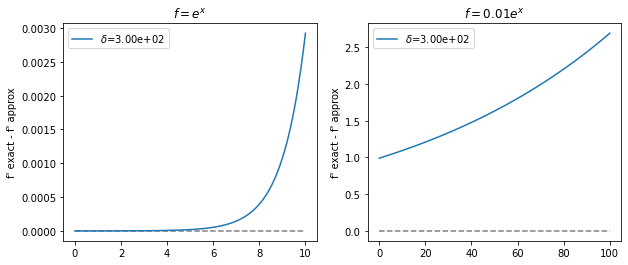

In [130]:
#graph of error between exact and fitted results - pretty good as error stays small (except for x >> 1 for the second function)
x = np.linspace(0, 10, 100)
y = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x, exp_1(x) - deriv_app(exp_1, x, delta_1(x)), label="$\delta$={0:.2e}".format(d))
ax[1].plot(y, exp_2(y) - deriv_app(exp_2, y, delta_2(y)), label="$\delta$={0:.2e}".format(d))
    
ax[0].set_title("$f = e^x$")
ax[0].hlines(0, x[0], x[-1], color="black", ls="--", alpha=0.5)
ax[0].legend()
ax[0].set_ylabel("f' exact - f' approx")

ax[1].set_title("$f = 0.01e^x$")
ax[1].hlines(0, y[0], y[-1], color="black", ls="--", alpha=0.5)
ax[1].legend()
ax[1].set_ylabel("f' exact - f' approx")

fig.show()

### 2.
*They are fed with a constant 10 µA current, and the voltage is read out.  
Lakeshore provides a chart that converts voltage to temperature*

*take an arbitrary voltage and interpolate to return a temperature.   
You should also make some sort of quantitative (but possibly rough) estimate of the error in your interpolation as well*

In [137]:
#[Temp [k], Voltage (V), dV/dT [mV/K]]
data = np.transpose(np.loadtxt('lakeshore.txt'))

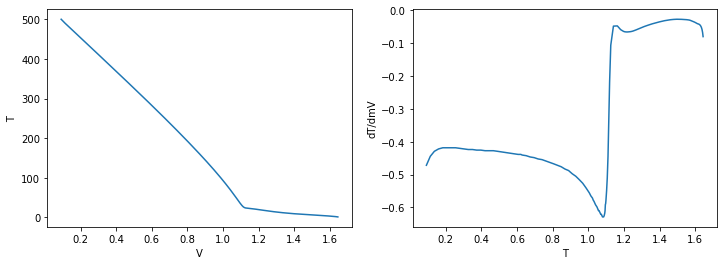

In [144]:
#just plotting the data to see what it looks like
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(data[1], data[0])
ax[0].set_ylabel('T')
ax[0].set_xlabel('V')

ax[1].plot(data[1], 1/data[2]) #need to inverse the derivative as I want temp from voltage
ax[1].set_xlabel('T')
ax[1].set_ylabel('dT/dmV')
plt.show()

Linear error bound:   
$|err| \leq \frac{(x_0 - x_1)^2}{8} \max_{x_0 \leq x \leq x_1} (|f''(x)|)$  

So for each interval of ($x_0, x_1$), I will find the second derivative numerically.

In [145]:
#got to fit the data and get error -> need to invert first
# can use dervi for error bounds

#linear equation from two points
def lin_equ(l1, l2):

    m = (l2[1] - l1[1]) / (l2[0] - l1[0])
    c = (l2[1] - (m * l2[0]))
#     print(m, c)
    return lambda x: m*x+c

#linear interpolation
def linearInterp(data, x):
    y_interp = []
    errors = []
    firstDeriv = data[2] * 1/1000
    
    if isinstance(x, int) or isinstance(x, float):
        x = [x]
    
    for i in range(len(x)):
        
        #finds right neighbour of x[i] in the data
        myind=np.argmax(np.where(x[i]<data[1]))
#         print(x[i], myind)
        
        #get linear function from two closest points
        f = lin_equ((data[1][myind], data[0][myind]), (data[1][myind-1], data[0][myind-1]))
        
        #evaluate at x
        y_interp.append(f(x[i]))
        
        #get second derivative (this is pretty rough)
        second_deriv = (1/firstDeriv[myind-1] - 1/firstDeriv[myind])/(data[1][myind-1] - data[1][myind])
        
        if second_deriv == 0:
            second_deriv = (1/firstDeriv[myind-2] - 1/firstDeriv[myind+1])/(data[1][myind-2] - data[1][myind+1])
        
        errors.append((data[1][myind] - data[1][myind-1])**2/8 * np.abs(second_deriv))
    
    return y_interp, errors


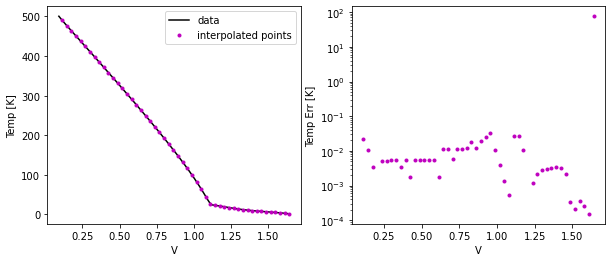

In [148]:
#plotting data and interpolated points
x = np.linspace(data[1][-2], data[1][1], 50)

y_interp, y_interp_err = linearInterp(data, x)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(data[1], data[0], color="black", label="data")
ax[0].plot(x, y_interp, ls = '', marker=".", color="m", label="interpolated points")
ax[0].legend()

ax[0].set_xlabel('V')
ax[0].set_ylabel('Temp [K]')

ax[1].semilogy(x, y_interp_err, ls = '', marker=".", color="m")
ax[1].set_xlabel('V')
ax[1].set_ylabel('Temp Err [K]')
plt.show()

In [141]:
#enter your own number here:
x = 0.5 #K

y_interp, y_interp_err = linearInterp(data, x)

# arbitrary voltage and interpolate to return a temperature.
print("The input voltage was: {0} V, the temperature is: {1:.2f} +/- {2:.4f} K".format(x, y_interp[0], y_interp_err[0]))

The input voltage was: 0.5 V, the temperature is: 325.76 +/- 0.0054 K


### 3.
*Take cos(x) between −π/2 and π/2.   
Compare the accuracy of polynomial, cubic spline, and rational function interpolation given some modest number of points, but for fairness each method should use the same points.*

In [112]:
#rational fitter, from class example 
def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m, inverse = 'multi', pri=False):
    
    #set up polynomial matrix
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
            
    #invert poly matrix and dot with y (the data) to get the polynomial coefficents
    if inverse == 'multi':
        pars=np.dot(np.linalg.inv(mat),y) #(multiplicative) inverse
    else:
        pars=np.dot(np.linalg.pinv(mat),y) #(Moore-Penrose) pseudo-inverse
    p=pars[:n]
    q=pars[n:]
    
    if pri:
        print(p,q)
    
    return p,q

In [113]:
#returns the fit of the function 'func' using three different methods
def fit_3(func, x_min, x_max, n=4, m=5, inverse = 'multi', pri=False):
    
    x = np.linspace(x_min, x_max, 8)
    y = func(x)

    xFit = np.linspace(x[0],x[-1],2000)
    y_true = func(xFit)

    #polynominal
    resl = np.polyfit(x,y, 2)
    p = np.poly1d(resl)
    yFit_poly = p(xFit)
    rms_poly = np.std(yFit_poly-y_true)

    #cubic spline
    spln = interpolate.splrep(x,y)
    yFit_spln = interpolate.splev(xFit,spln)
    rms_spln = np.std(yFit_spln-y_true)

    #rational
    p,q=rat_fit(x,y,n,m, inverse, pri)
    yFit_rat=rat_eval(p,q,xFit)
    rms_rat = np.std(yFit_rat-y_true)
    
    return [x, y, xFit, y_true], [yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat]

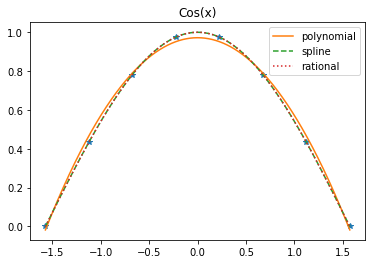

The rms value for the polynomial is 2.115e-02, for the cubic spline it's 2.069e-04,and the rational function it's 3.486e-05.


In [114]:
#calling fit function and graphin results
results = fit_3(np.cos, -np.pi/2, np.pi/2)
yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat = results[1]
x, y, xFit, y_true = results[0]

plt.clf();
plt.plot(x,y,'*')

plt.plot(xFit, yFit_poly, label="polynomial")
plt.plot(xFit, yFit_spln, label="spline", ls="--")
plt.plot(xFit, yFit_rat, label="rational", ls=":")
plt.title("Cos(x)")
plt.legend()
plt.show()

print("The rms value for the polynomial is {0:.3e}, for the cubic spline it's {1:.3e},\
and the rational function it's {2:.3e}.".format(rms_poly, rms_spln, rms_rat))

In [119]:
n = 4
m = 5

x = np.linspace(-1, 1, 8)
y = Lor(x)

mat=np.zeros([n+m-1,n+m-1])

for i in range(n):
    print(i, x**i)
    mat[:,i]=x**i
for i in range(1,m):
    print(i-1+n)
    mat[:,i-1+n]=-y*x**i
    
# print(y)
    
# print(mat[:, 0])
print(mat)

0 [1. 1. 1. 1. 1. 1. 1. 1.]
1 [-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]
2 [1.         0.51020408 0.18367347 0.02040816 0.02040816 0.18367347
 0.51020408 1.        ]
3 [-1.         -0.36443149 -0.0787172  -0.00291545  0.00291545  0.0787172
  0.36443149  1.        ]
4
5
6
7
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   5.00000000e-01 -5.00000000e-01  5.00000000e-01 -5.00000000e-01]
 [ 1.00000000e+00 -7.14285714e-01  5.10204082e-01 -3.64431487e-01
   4.72972973e-01 -3.37837838e-01  2.41312741e-01 -1.72366244e-01]
 [ 1.00000000e+00 -4.28571429e-01  1.83673469e-01 -7.87172012e-02
   3.62068966e-01 -1.55172414e-01  6.65024631e-02 -2.85010556e-02]
 [ 1.00000000e+00 -1.42857143e-01  2.04081633e-02 -2.91545190e-03
   1.40000000e-01 -2.00000000e-02  2.85714286e-03 -4.08163265e-04]
 [ 1.00000000e+00  1.42857143e-01  2.04081633e-02  2.91545190e-03
  -1.40000000e-01 -2.00000000e-02 -2.85714286e-03 -4.08163265e-04]
 [ 1.

gotta get a real answer here   
I would expect the error to be better for the Lorentzian from the rational fit compared to the cosine law, as the function goes to 0 as x --> +/- inf, however this isn't really evident from the interval we're looking at. However, as seen below, this doesn't happen, the fit is very bad, it looks like there is almost an asymptote around 0, where there clearly should not be. 

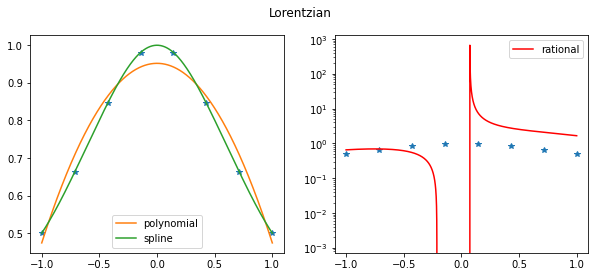

For this functions, the rms value for the polynomial is 3.233e-02, for the cubic spline it's 6.753e-04,and the rational function it's 3.340e+01.


In [97]:
#repeat the above but now with a lorentzian

#lorentzian function
def Lor(x):
    return 1/(1+x**2)

results = fit_3(Lor, -1, 1)

yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat = results[1]
x, y, xFit, y_true = results[0]

fig, ax = plt.subplots(1, 2, figsize=(10,4))

fig.suptitle('Lorentzian')

ax[0].plot(x,y,'*')
ax[0].plot(xFit, yFit_poly, label="polynomial")
ax[0].plot(xFit, yFit_spln, label="spline")
ax[0].legend()

ax[1].plot(x,y,'*')
ax[1].semilogy(xFit, yFit_rat, label="rational", color='r')
ax[1].legend()

plt.show()

print("For this functions, the rms value for the polynomial is {0:.3e}, for the cubic spline it's {1:.3e},\
and the rational function it's {2:.3e}.".format(rms_poly, rms_spln, rms_rat))

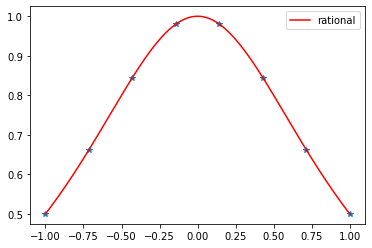

The rms value is now 3.140e-16, using the 'pinv' function with the rational function.


In [88]:
#lorenzian fit with second matrix inversion function
results = fit_3(Lor, -1, 1, inverse="mp")

yFit_poly, rms_poly, yFit_spln, rms_spln, yFit_rat, rms_rat = results[1]
x, y, xFit, y_true = results[0]

plt.plot(x,y,'*')
plt.plot(xFit, yFit_rat, label="rational", color='r')
plt.legend()
plt.show()

print("The rms value is now {0:.3e}, using the 'pinv' function with the rational function.".format(rms_rat))

This fit and error value make much more sense. The polynomial coefficents change alot when you switch which matrix inversion function is being used, they are much bigger values for the first fit that did not work vs the second, where non of the coefficents are bigger than 1. For the first fit, although the fit near the sides is decent, the dominating values near 0 are the quadratic in the numerator and the cubic in the demomator, this gives 1/x behavior here, which has an asymptote at x = 0, explaining the behavor of the fit. The second fit however has x behavior near 0, which is well behaved.

In [80]:
#work to look at the different behavior of the two rational fits
results = fit_3(Lor, -1, 1, pri=True)

results = fit_3(Lor, -1, 1, inverse="mp", pri=True)

[ -4.29862069 -20.           2.           3.96729867] [-14.   4.  -2.   0.]
[ 1.00000000e+00  1.33226763e-15 -3.33333333e-01 -1.77635684e-15] [ 1.77635684e-15  6.66666667e-01 -8.88178420e-16 -3.33333333e-01]


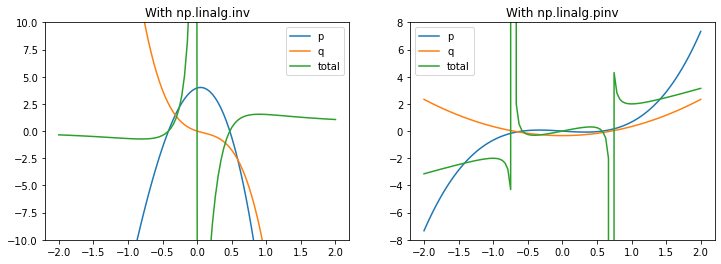

In [102]:
#get polynomials for each part of the rational fit, using p and q coefficents for each one
f_1_p = np.poly1d([ -4.29862069, -20., 2., 3.96729867])
f_1_q = np.poly1d( [-14., 4., -2., 0.])

f_2_p = np.poly1d([ 1.00000000e+00,  1.33226763e-15, -3.33333333e-01, -1.77635684e-15])
f_2_q = np.poly1d([ 1.77635684e-15,  6.66666667e-01, -8.88178420e-16, -3.33333333e-01])

#plotting
x = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(x, f_1_p(x), label='p')
ax[0].plot(x, f_1_q(x), label='q')
ax[0].plot(x, f_1_p(x)/f_1_q(x), label='total')
ax[0].set_ylim(-10, 10)
ax[0].set_title("With np.linalg.inv")
ax[0].legend()

ax[1].plot(x, f_2_p(x), label='p')
ax[1].plot(x, f_2_q(x), label='q')
ax[1].plot(x, f_2_p(x)/f_2_q(x), label='total')
ax[1].set_ylim(-8, 8)
ax[1].set_title("With np.linalg.pinv")
ax[1].legend()

plt.show()

### 4.
*One can work out the electric field from an infinitessimally thin spherical shell of charge with radius R by working out the field from a ring along its central axis, and integrating those rings to form a spherical shell. 

Use both your integrator and scipy.integrate.quad to plot the electric field from the shell as a function of distance from the center of the sphere. 

Make sure the range of your plot covers regions with z < R and z > R. Make sure one of your z values is R. Is there a singularity in the integral? Does quad care? Does your integrator? 

Griffiths problem 2.7, which sets up the integral.*

In [149]:
#integral for eletric field, needs to be multiplied by: charge/(8*np.pi*epsilon_0)
def Eint(theta, z, R):
    return (z-R*np.cos(theta))/((z-R*np.cos(theta))**2 + (R*np.sin(theta))**2)**3/2 * np.sin(theta)

In [211]:
def legendre_mat(npt):
    #Make a square legendre polynomial matrix of desired dimension
    x=np.linspace(-1,1,npt)
    #initalize npt x npt matrix
    mat=np.zeros([npt,npt])
    
    #set first two columns manually
    mat[:,0]=1.0
    mat[:,1]=x
    
    #use recurrence relation to fill others
    if npt>2:
        for i in range(1,npt-1):
            mat[:,i+1]=((2.0*i+1)*x*mat[:,i]-i*mat[:,i-1])/(i+1.0)
    return mat

def integration_coeffs_legendre(npt):
    #Find integration coefficients using square legendre polynomial matrix
    
    #get the matrix of legendre polynomials
    mat=legendre_mat(npt)
    
    #invert and take first row to get coeff
    mat_inv=np.linalg.inv(mat)
    coeffs=mat_inv[0,:]
    
    coeffs=coeffs/coeffs.sum()*(npt-1.0)
    return coeffs

def LegendreIntegrate(func, xMin, xMax, dxTarg, z, R, order=2):
    #get the coeff for required orders
    coeffs = integration_coeffs_legendre(order+1)
    
    #how many points do we need?
    npt=np.int((xMax - xMin)/dxTarg) + 1
    
    nn=(npt-1)%order
#     print(npt, nn)
    
    if nn>0:
        npt=npt+order-nn
    assert(npt%order==1)
    
    #make our array of x value we are integrating over
    x=np.linspace(xMin, xMax, npt)
    
    #get spacing between points
    dx=np.median(np.diff(x))
    dat=func(x, z, R)
    
#     print((npt-1)/order, order)
    
    mat=np.reshape(dat[:-1], [np.int((npt-1)/order), order]).copy()
    mat[0, 0]=mat[0, 0]+dat[-1]
    mat[1:,0]=2*mat[1:,0]
    
    #summ first col of the matrix
    vect=np.sum(mat,axis=0)
    
    tot=np.sum(vect*coeffs[:-1])*dx
    print(vect, coeffs[:-1], dx)
    
    return tot

In [200]:
myE_Field = []
for x in Zs:
#     print(x)
    myE_Field.append(LegendreIntegrate(Eint, 0, 1.5, 0.01, z=x, R=1, order=2))
    
# print(myE_Field)

myE_Field = np.array(myE_Field)

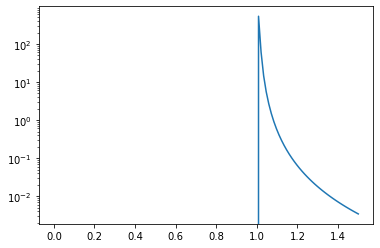

In [201]:
plt.semilogy(Zs, myE_Field*Q/(8*np.pi*ep))
# plt.ylim(1e-200, 100)

plt.show()

In [187]:
#using scipy.integrate.quad

Zs = np.linspace(0, 1.5, 120)

ep = 8.85e-12
Q = 1e-12

s = set(Zs)
if not 1.0 in s:
    print('Need z=R!')
    np.append(Zs, 1)

E_Field = []
for x in Zs:
    E_Field.append(integrate.quad(Eint, 0, np.pi, args=(x, 1)))

E_Field = np.transpose(E_Field)

Need z=R!


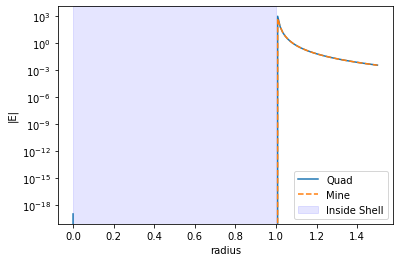

In [230]:
plt.semilogy(Zs, E_Field[0]*Q/(8*np.pi*ep), label="Quad")
plt.semilogy(Zs, myE_Field*Q/(8*np.pi*ep), ls = "--", label="Mine")
plt.xlabel("radius")
plt.ylabel("|E|")
plt.axvspan(0, 1, alpha=0.1, color='b', label='Inside Shell')
plt.legend()

# plt.ylim(1e-200, 100)

plt.show()

In [214]:
x = 1

print(integrate.quad(Eint, 0, np.pi, args=(x, 1)))

print(LegendreIntegrate(Eint, 0, 1.5, 0.01, z=x, R=1, order=2))

(-0.020832664739771793, 1.6229844874413035e-05)
[            nan 262947.10564281] [0.33333333 1.33333333] 0.010000000000000009
nan


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Yes there is a singularity in the intergral (at z=R), the scipy integrator does not have a problem with this, but the Legrendre one does, as it returns nan for this value.